### Business Problem:

*  To understand about the factors which are important in graduate admissions and 
   how these factors are interrelated among themselves which will help Educational 
   Institutions to predict one's chances of admission given the rest of the variables.
   

### Column Profiling:
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

### Overview of the notebook:
* Missing and Duplicacy Check
* Exploratory Data Analysis
   * Univariate Analysis
   * Bivariate Analysis
* Module Building   

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data1 = pd.read_csv('Admission_Predict.csv')
data1

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [91]:
 data1.isnull().sum()

Serial No.          0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

In [92]:
#Dropping the unique row Identifier - which is Serial No.

data = data1.drop('Serial No.', axis = 1)
data.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [93]:
data.shape

(400, 8)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GREScore          400 non-null    int64  
 1   TOEFLScore        400 non-null    int64  
 2   UniversityRating  400 non-null    int64  
 3   SOP               400 non-null    float64
 4   LOR               400 non-null    float64
 5   CGPA              400 non-null    float64
 6   Research          400 non-null    int64  
 7   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
data.describe()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
numerical_var_colm = ['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceofAdmit']

for i in numerical_var_colm:
    print(f" Unique value count in {i} is {data[i].nunique()}")

 Unique value count in GREScore is 49
 Unique value count in TOEFLScore is 29
 Unique value count in UniversityRating is 5
 Unique value count in SOP is 9
 Unique value count in LOR is 9
 Unique value count in CGPA is 168
 Unique value count in Research is 2
 Unique value count in ChanceofAdmit is 60


In [ ]:
disc_var_colm = ['UniversityRating', 'SOP', 'LOR','Research']
for i in disc_var_colm:
    print(f" Unique values in {i} are {data[i].unique()}")

 Unique values in UniversityRating are [4 3 2 5 1]
 Unique values in SOP are [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
 Unique values in LOR are [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
 Unique values in Research are [1 0]


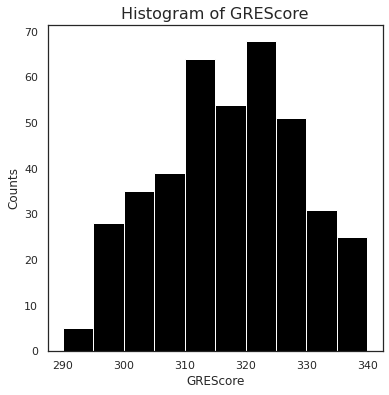

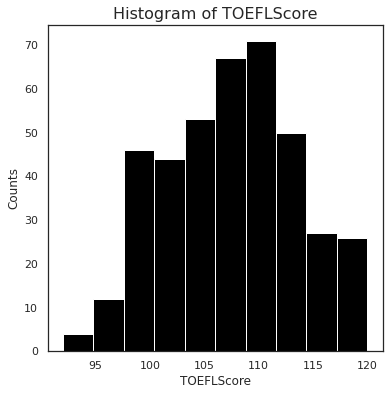

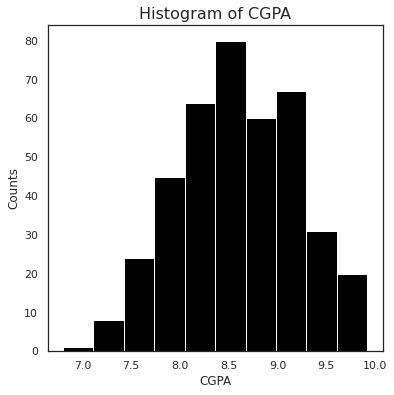

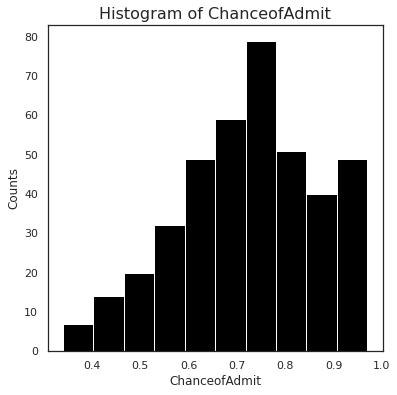

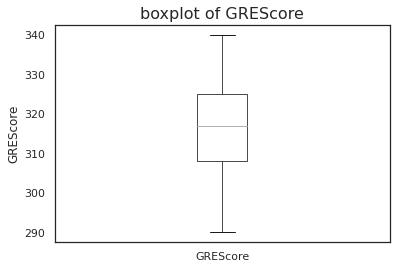

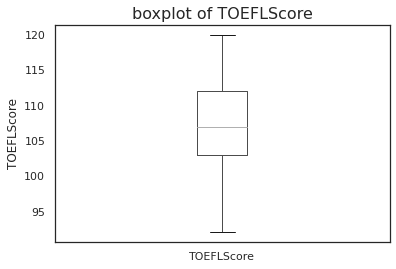

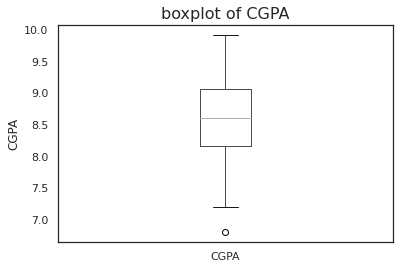

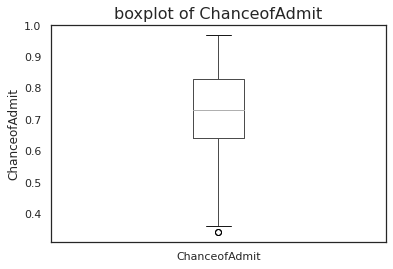

In [ ]:
numerical_var_colm = ['GREScore', 'TOEFLScore', 'CGPA', 'ChanceofAdmit']

for i in numerical_var_colm:
    data.hist(column=i,grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=10)

    
    plt.xlabel(i,fontsize = 12)
    plt.ylabel('Counts',fontsize = 12)
    plt.title( f'Histogram of {i}',fontsize = 16)
    plt.show()
    
for i in numerical_var_colm:
    data.boxplot(column=i,grid=False)
    plt.ylabel(i,fontsize = 12)
    plt.title( f'boxplot of {i}',fontsize = 16)
    plt.show()

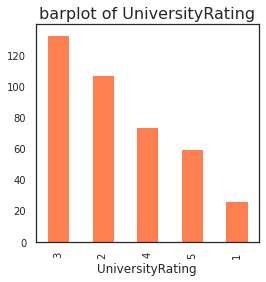

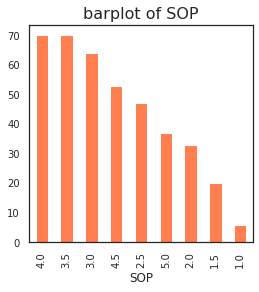

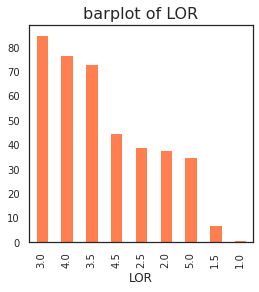

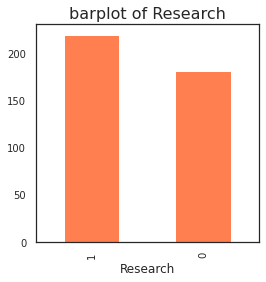

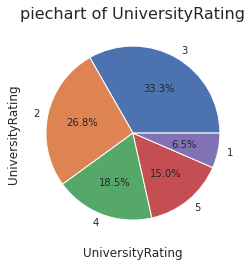

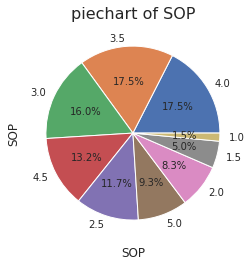

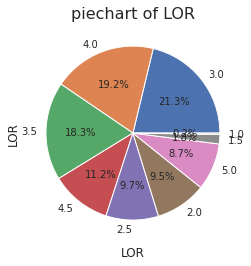

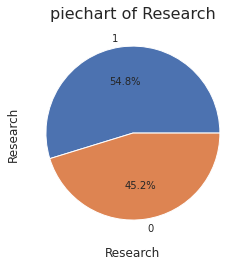

In [ ]:
disc_var_colm = ['UniversityRating', 'SOP', 'LOR', 'Research']
for i in disc_var_colm:
    data[i].value_counts().plot(kind='bar',figsize=(4,4),color='coral',fontsize=10)
    plt.xlabel(i,fontsize = 12)
    plt.title( f'barplot of {i}',fontsize = 16)
    
    plt.show()
    
for i in disc_var_colm:
    data[i].value_counts().plot(kind='pie',figsize=(4,4),fontsize=10, autopct='%1.1f%%')
    plt.xlabel(i,fontsize = 12)
    plt.title( f'piechart of {i}',fontsize = 16)
    
    plt.show()

In [ ]:
data_new = data.copy()
bins = [290,300,310,320,330,340]
labels =["290-300","300-310","310-320","320-330","330-340"]
data_new['GRE_Score_bins'] = pd.cut(data_new['GREScore'], bins,labels=labels)

bins = [90,100,110,120]
labels =['90-100','100-110','110-120']
data_new['TOEFL_Score_bins'] = pd.cut(data_new['TOEFLScore'], bins,labels=labels)

bins = [6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0]
labels =['6.5-7.0','7.0-7.5','7.5-8.0','8.0-8.5','8.5-9.0','9.0-9.5','Above 9.5']
data_new['CGPA_bins'] = pd.cut(data_new['CGPA'], bins,labels=labels)

data_new.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,GRE_Score_bins,TOEFL_Score_bins,CGPA_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,330-340,110-120,Above 9.5
1,324,107,4,4.0,4.5,8.87,1,0.76,320-330,100-110,8.5-9.0
2,316,104,3,3.0,3.5,8.00,1,0.72,310-320,100-110,7.5-8.0
3,322,110,3,3.5,2.5,8.67,1,0.80,320-330,100-110,8.5-9.0
4,314,103,2,2.0,3.0,8.21,0,0.65,310-320,100-110,8.0-8.5


------------ UNIVERSITYRATING ------------------
Research           0   1
UniversityRating        
1                 21   5
2                 75  32
3                 62  71
4                 15  59
5                  8  52
 
Research                 0         1
UniversityRating                    
1                 0.807692  0.192308
2                 0.700935  0.299065
3                 0.466165  0.533835
4                 0.202703  0.797297
5                 0.133333  0.866667


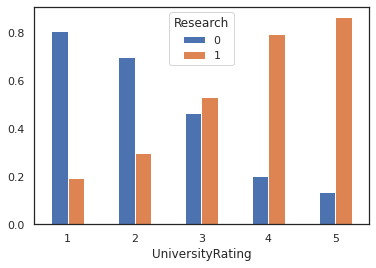

 
------------ SOP ------------------
Research   0   1
SOP             
1.0        5   1
1.5       17   3
2.0       27   6
2.5       33  14
3.0       34  30
3.5       27  43
4.0       21  49
4.5       12  41
5.0        5  32
 
Research         0         1
SOP                         
1.0       0.833333  0.166667
1.5       0.850000  0.150000
2.0       0.818182  0.181818
2.5       0.702128  0.297872
3.0       0.531250  0.468750
3.5       0.385714  0.614286
4.0       0.300000  0.700000
4.5       0.226415  0.773585
5.0       0.135135  0.864865


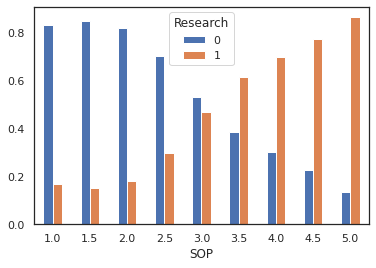

 
------------ LOR ------------------
Research   0   1
LOR             
1.0        1   0
1.5        5   2
2.0       29   9
2.5       29  10
3.0       45  40
3.5       35  38
4.0       24  53
4.5        7  38
5.0        6  29
 
Research         0         1
LOR                         
1.0       1.000000  0.000000
1.5       0.714286  0.285714
2.0       0.763158  0.236842
2.5       0.743590  0.256410
3.0       0.529412  0.470588
3.5       0.479452  0.520548
4.0       0.311688  0.688312
4.5       0.155556  0.844444
5.0       0.171429  0.828571


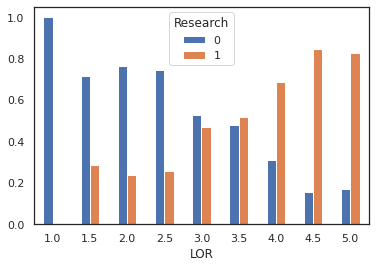

 
------------ UNIVERSITYRATING ------------------
SOP               1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
UniversityRating                                             
1                   5    8    7    2    2    2    0    0    0
2                   1   10   15   35   25    9    9    3    0
3                   0    0   10    9   30   51   26    5    2
4                   0    2    1    1    5    6   21   27   11
5                   0    0    0    0    2    2   14   18   24
 
SOP                    1.0       1.5       2.0       2.5       3.0       3.5  \
UniversityRating                                                               
1                 0.192308  0.307692  0.269231  0.076923  0.076923  0.076923   
2                 0.009346  0.093458  0.140187  0.327103  0.233645  0.084112   
3                 0.000000  0.000000  0.075188  0.067669  0.225564  0.383459   
4                 0.000000  0.027027  0.013514  0.013514  0.067568  0.081081   
5                 0.000000  0.000

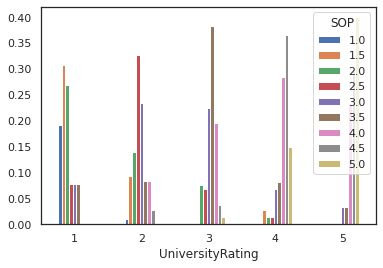

 
------------ RESEARCH ------------------
SOP       1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Research                                             
0           5   17   27   33   34   27   21   12    5
1           1    3    6   14   30   43   49   41   32
 
SOP            1.0       1.5       2.0       2.5       3.0       3.5  \
Research                                                               
0         0.027624  0.093923  0.149171  0.182320  0.187845  0.149171   
1         0.004566  0.013699  0.027397  0.063927  0.136986  0.196347   

SOP            4.0       4.5       5.0  
Research                                
0         0.116022  0.066298  0.027624  
1         0.223744  0.187215  0.146119  


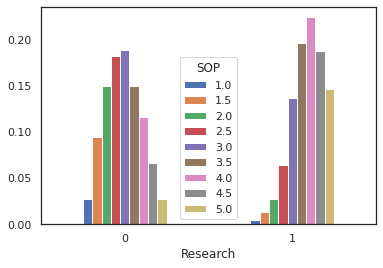

 
------------ LOR ------------------
SOP  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
LOR                                             
1.0    1    0    0    0    0    0    0    0    0
1.5    1    1    2    2    1    0    0    0    0
2.0    2   13    5    9    7    1    1    0    0
2.5    2    3   14    6    6    6    2    0    0
3.0    0    2    7   18   20   25   10    3    0
3.5    0    1    3    7   21   15   15    9    2
4.0    0    0    2    4    7   19   18   21    6
4.5    0    0    0    1    1    2   16   14   11
5.0    0    0    0    0    1    2    8    6   18
 
SOP       1.0       1.5       2.0       2.5       3.0       3.5       4.0  \
LOR                                                                         
1.0  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.5  0.142857  0.142857  0.285714  0.285714  0.142857  0.000000  0.000000   
2.0  0.052632  0.342105  0.131579  0.236842  0.184211  0.026316  0.026316   
2.5  0.051282  0.076923  0.358974  0

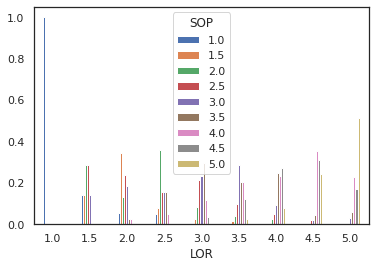

 
------------ SOP ------------------


AttributeError: ignored

In [ ]:
list1 = ['UniversityRating', 'SOP','Research','LOR']

for cvar in list1:
    if cvar == 'Research':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.Research)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')
    

for cvar in list1:
    if cvar == 'SOP':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.SOP)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')

for cvar in list1:
    if cvar == 'UniversityRating':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.University_Rating)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')
    
for cvar in list1:
    if cvar == 'LOR':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.LOR)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')
    
    

In [ ]:
data = data.drop('UniversityRating', axis = 1)
data = data.drop('SOP', axis = 1)
data = data.drop('LOR', axis = 1)
data = data.drop('Research', axis = 1)

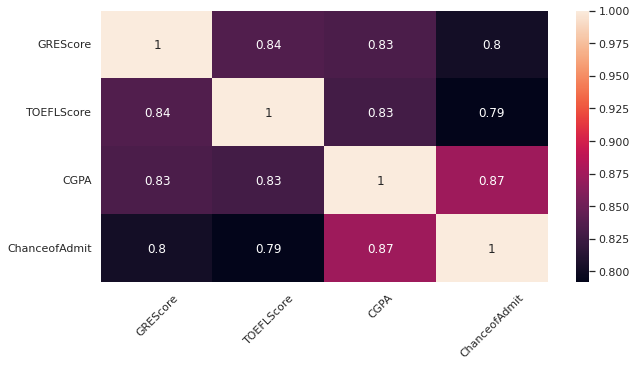

In [ ]:
# Correaltion between numerical variables

plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(method="pearson"),annot = True)
plt.yticks(rotation = 360)
plt.xticks(rotation = 45)
plt.show()

### Linear Regression Module

In [ ]:
import statsmodels.api as stm

In [ ]:
df = pd.get_dummies(data,columns=['UniversityRating', 'SOP', 'LOR', 'Research'],drop_first=True)
df.head()

,GREScore,TOEFLScore,CGPA,ChanceofAdmit,UniversityRating_2,UniversityRating_3,UniversityRating_4,UniversityRating_5,SOP_1.5,SOP_2.0,...,SOP_5.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0,Research_1
0,337,118,9.65,0.92,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,324,107,8.87,0.76,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,316,104,8.00,0.72,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,322,110,8.67,0.80,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,314,103,8.21,0.65,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.reset_index(drop = True)

,GREScore,TOEFLScore,CGPA,ChanceofAdmit,UniversityRating_2,UniversityRating_3,UniversityRating_4,UniversityRating_5,SOP_1.5,SOP_2.0,...,SOP_5.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0,Research_1
0,337,118,9.65,0.92,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,324,107,8.87,0.76,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,316,104,8.00,0.72,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,322,110,8.67,0.80,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,314,103,8.21,0.65,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,324,110,9.04,0.82,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
396,325,107,9.11,0.84,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
397,330,116,9.45,0.91,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
398,312,103,8.78,0.67,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Module 1

In [ ]:
#Model 1
# In our first model we use all the features available in our dataset
import statsmodels.api as sm
X = df.drop(columns=['ChanceofAdmit'])
Y = df['ChanceofAdmit']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state=1)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

X= x_train
Y= y_train

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y,X_sm).fit()

In [ ]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     56.68
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          1.08e-102
Time:                        10:57:22   Log-Likelihood:                 487.69
No. Observations:                 360   AIC:                            -925.4
Df Residuals:                     335   BIC:                            -828.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1285      0

In [ ]:
#Model 2
#We remove all the categories whose p value was not significant 
X = df[['GREScore','TOEFLScore','CGPA','Research_1']]
Y = df['ChanceofAdmit']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state=1)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

X= x_train
Y= y_train

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y,X_sm).fit()

In [ ]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     318.0
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          6.06e-116
Time:                        10:57:31   Log-Likelihood:                 469.87
No. Observations:                 360   AIC:                            -929.7
Df Residuals:                     355   BIC:                            -910.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2996      0.125    -10.365      0.0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF',ascending=False)
vif

,Features,VIF
0,const,1296.75
1,GREScore,4.50
3,CGPA,4.13
2,TOEFLScore,4.00
4,Research_1,1.56


In [ ]:
#Model 3
# We delete all the columns whose VIF value is more than 5. However we chose to keep CGPA
X = df[['CGPA','Research_1']]
Y = df['ChanceofAdmit']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state=1)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

X= x_train
Y= y_train

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y,X_sm).fit()

In [ ]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     591.3
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          5.00e-114
Time:                        10:57:42   Log-Likelihood:                 458.91
No. Observations:                 360   AIC:                            -911.8
Df Residuals:                     357   BIC:                            -900.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9270      0.060    -15.418      0.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state=1)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
finalmodel = sm.OLS(y_train,x_train).fit()
print(finalmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     502.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.36e-99
Time:                        10:57:47   Log-Likelihood:                 405.88
No. Observations:                 324   AIC:                            -805.8
Df Residuals:                     321   BIC:                            -794.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9457      0.065    -14.579      0.0

In [ ]:
print(finalmodel.params)

const        -0.945732
CGPA          0.191942
Research_1    0.036734
dtype: float64


In [ ]:
predictions = finalmodel.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
print(f'The Mean Absolute Error is : {mean_absolute_error(y_test,predictions)}')
print(f'The Mean Squared Error is : {mean_squared_error(y_test,predictions)}')
print(f'The Root Mean Squared Error is : {np.sqrt(mean_squared_error(y_test,predictions))}')
print(f'The Mean Absolute Percentage Error is : {mean_absolute_percentage_error(y_test,predictions)*100}%')

The Mean Absolute Error is : 0.041722027075290526
The Mean Squared Error is : 0.0027330774447946096
The Root Mean Squared Error is : 0.052278843185313596
The Mean Absolute Percentage Error is : 6.275773820420485%


In [ ]:
errors = y_test - predictions
abs(errors.mean())

0.0019005418598428984

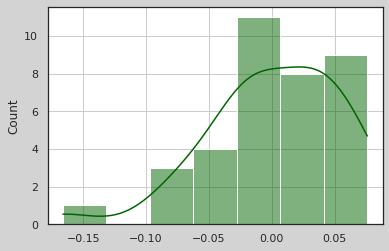

In [ ]:
fig = plt.figure(figsize=(6,4)) #Setting the figure size
ax = fig.add_subplot(111)
sns.histplot(errors,kde=True,color='darkgreen',ax=ax) #Histogram with kde plot
sns.set(style='white')
fig.set_facecolor("lightgray") #Beautifying
plt.grid() #Plotting the grid
plt.show()

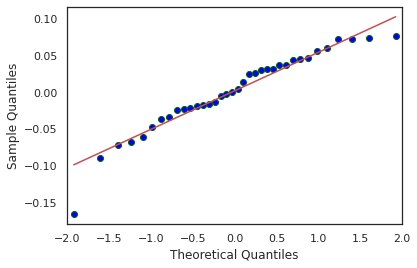

In [ ]:
import statsmodels.api as sm
sm.qqplot(errors, line = 's',color='darkgreen')
plt.show()

Text(0.5, 1.0, 'Actual values Vs Predicted values')

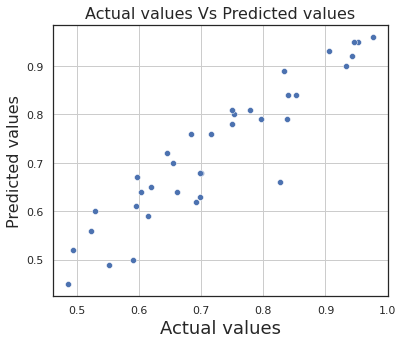

In [ ]:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(predictions,y_test)
plt.grid()
plt.xlabel('Actual values', fontsize=18)                        
plt.ylabel('Predicted values', fontsize=16)  
plt.title('Actual values Vs Predicted values', fontsize=16)

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(finalmodel.resid, finalmodel.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 21.706450572528187),
 ('p-value', 1.93421232941424e-05),
 ('f-value', 11.52484174236952),
 ('f p-value', 1.4667668853079756e-05)]

### Decision Tree

In [95]:
# for importing tree
from sklearn import tree

In [99]:
df2 = data1.drop('Serial No.',axis=1)
df2

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_percentage_error, mean_squared_error, confusion_matrix,precision_score,r2_score 
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [105]:
x = df2.drop('ChanceofAdmit',axis=1)
y = df2['ChanceofAdmit']

In [117]:
# for test-train split
from sklearn.model_selection import train_test_split

#Train - Test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

#Train - Validation split
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.25)


In [118]:
# for fitting Clasifier tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

In [119]:
depth = np.arange(1,20)
mae=[]

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k,min_samples_leaf=5)   
    reg_tree.fit(x_train,y_train)
    y_pred= reg_tree.predict(x_valid)
    mae.append(np.mean(np.abs(y_valid-y_pred)))    

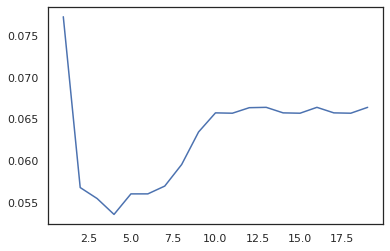

In [120]:
plt.plot(depth,np.array(mae))
plt.show()

In [121]:
depth = 4

In [122]:
# Fit the Deep Tree model of depth 4 on the training data and test it's performance on test data by 
# calculating the the MAE

reg_tree = DecisionTreeRegressor(max_depth=4,min_samples_leaf=5)   
reg_tree.fit(x_train,y_train)
y_pred= reg_tree.predict(x_valid)
np.mean(np.abs(y_valid-y_pred))  #MAE

0.053653044834534605

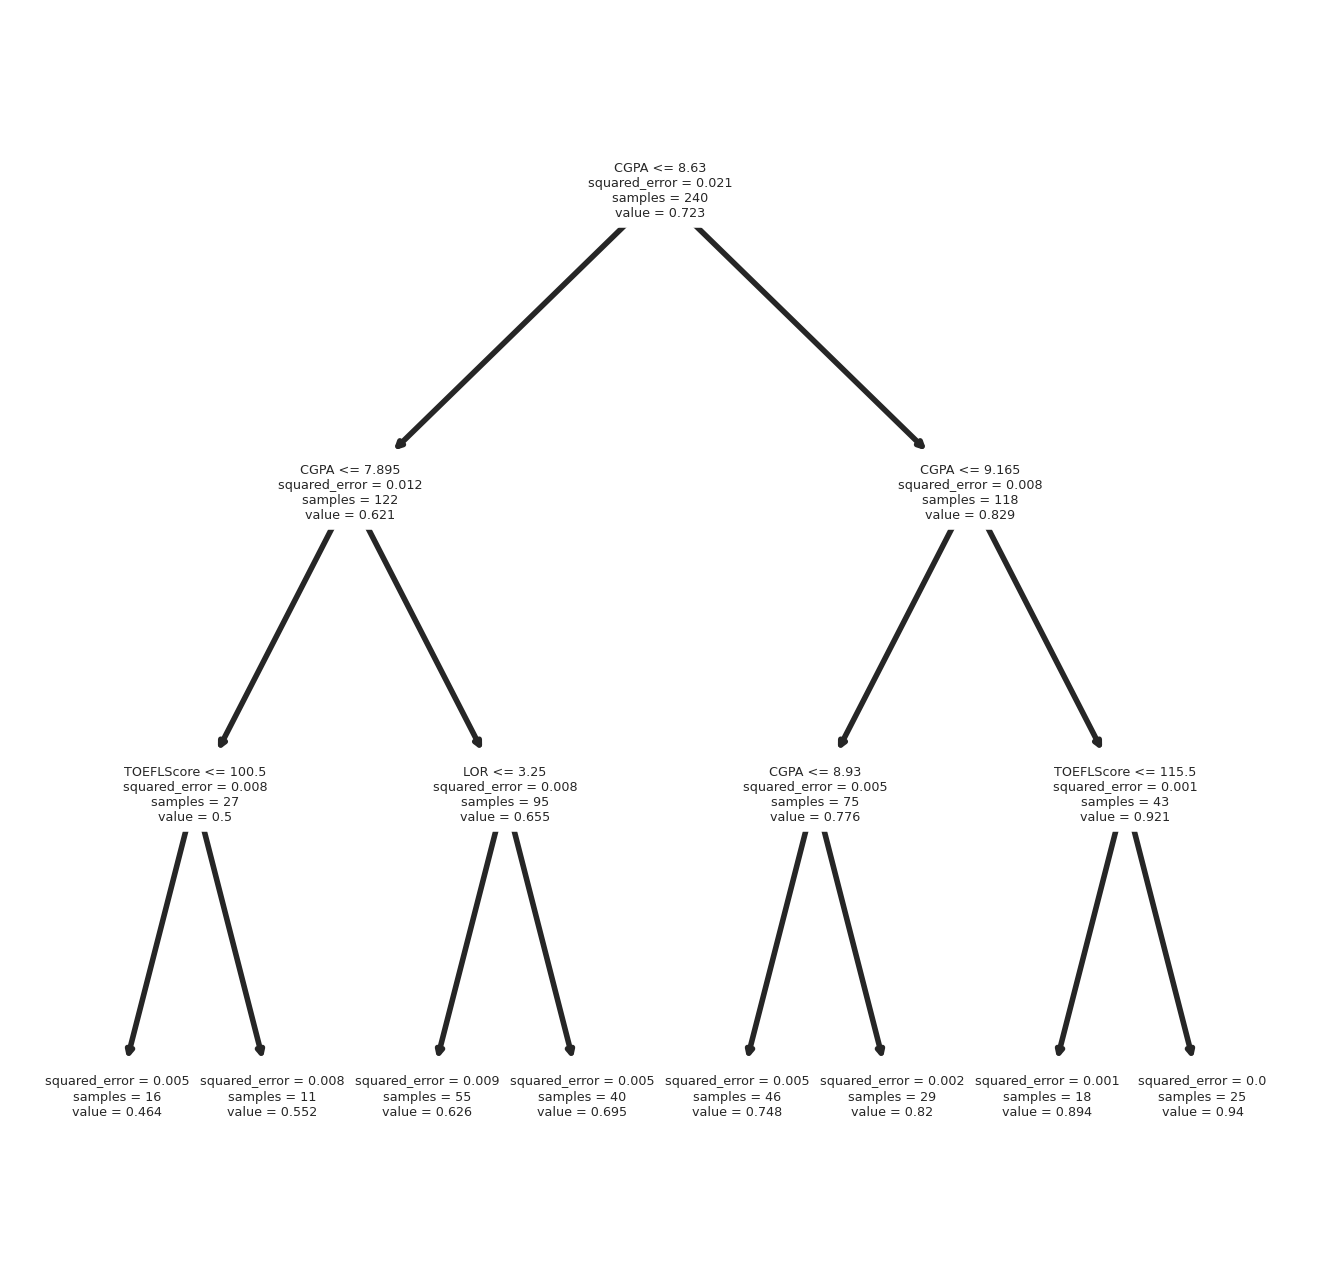

In [125]:
# for importing tree
from sklearn import tree
fig,axes = plt.subplots(figsize=(4,4),dpi=400)
tree.plot_tree(reg_tree,feature_names=list(x),filled=False)
plt.show()

In [126]:
y_pred = reg_tree.predict(x_valid)
y_pred

array([0.62618182, 0.81965517, 0.695     , 0.62618182, 0.81965517,
       0.46375   , 0.695     , 0.74804348, 0.94      , 0.62618182,
       0.89444444, 0.74804348, 0.74804348, 0.46375   , 0.46375   ,
       0.62618182, 0.62618182, 0.89444444, 0.74804348, 0.81965517,
       0.74804348, 0.81965517, 0.74804348, 0.74804348, 0.62618182,
       0.695     , 0.62618182, 0.81965517, 0.62618182, 0.94      ,
       0.81965517, 0.74804348, 0.695     , 0.74804348, 0.46375   ,
       0.46375   , 0.695     , 0.89444444, 0.94      , 0.62618182,
       0.62618182, 0.81965517, 0.74804348, 0.62618182, 0.81965517,
       0.55181818, 0.74804348, 0.62618182, 0.81965517, 0.62618182,
       0.89444444, 0.62618182, 0.89444444, 0.695     , 0.74804348,
       0.46375   , 0.89444444, 0.46375   , 0.62618182, 0.74804348,
       0.62618182, 0.62618182, 0.89444444, 0.695     , 0.46375   ,
       0.62618182, 0.55181818, 0.62618182, 0.46375   , 0.46375   ,
       0.81965517, 0.62618182, 0.62618182, 0.94      , 0.62618

In [129]:
#MAE
print('MAE IS:',np.mean(np.abs(y_valid-y_pred)))
#MSE
print('MSE is:',np.mean(np.abs(y_valid-y_pred)**2))
#RMSE
print('RMSE is:',np.sqrt(np.mean(np.abs(y_valid-y_pred)**2)))
#MAPE
print('MAPE is:',np.mean(np.abs(y_valid-y_pred)/y_valid)*100)

MAE IS: 0.055544619262338536
MSE is: 0.00562816382674084
RMSE is: 0.0750210892132395
MAPE is: 8.365952287775693


TypeError: ignored